## First let's do some symbolic derivation

In [1]:
from IPython.display import Math,display
import sympy

In [2]:
xs=x0,x1,x2,x3=sympy.symbols('x:4')
ys=y0,y1,y2,y3=sympy.symbols('y:4')
xy=sympy.Matrix([xs,ys]).T
display(xy)

Matrix([
[x0, y0],
[x1, y1],
[x2, y2],
[x3, y3]])

In [3]:
# corrdinate of parent domain
xi,eta=sympy.symbols('xi eta')
# shape functions
N=sympy.Rational(1,4)*sympy.Matrix([(1-xi)*(1-eta),(1+xi)*(1-eta),(1+xi)*(1+eta),(1-xi)*(1+eta)]).T
display(N)
# partial(N1,N2,N3,N4)/partial(xi,eta)
GN=sympy.Matrix([[sympy.diff(i,xi) for i in N],[sympy.diff(i,eta) for i in N]])
display(GN)

Matrix([[(1 - eta)*(1 - xi)/4, (1 - eta)*(xi + 1)/4, (eta + 1)*(xi + 1)/4, (1 - xi)*(eta + 1)/4]])

Matrix([
[eta/4 - 1/4, 1/4 - eta/4, eta/4 + 1/4, -eta/4 - 1/4],
[ xi/4 - 1/4, -xi/4 - 1/4,  xi/4 + 1/4,   1/4 - xi/4]])

In [4]:
# J is partial(x,y)/partial(xi,eta)
J=sympy.simplify(GN*xy)
display(J)
Jdet=sympy.simplify(J.det())
Jinv=sympy.simplify(J**(-1))
# partial(N1,N2,N3,N4)/partial(x,y)
NablaN=sympy.simplify(Jinv*GN)

Matrix([
[x0*(eta - 1)/4 - x1*(eta - 1)/4 + x2*(eta + 1)/4 - x3*(eta + 1)/4, y0*(eta - 1)/4 - y1*(eta - 1)/4 + y2*(eta + 1)/4 - y3*(eta + 1)/4],
[    x0*(xi - 1)/4 - x1*(xi + 1)/4 + x2*(xi + 1)/4 - x3*(xi - 1)/4,     y0*(xi - 1)/4 - y1*(xi + 1)/4 + y2*(xi + 1)/4 - y3*(xi - 1)/4]])

In [5]:
Ksym=[]
for i in range(4):
    Ksym.append([])
    for j in range(0,i+1):
        integrand=sympy.simplify(Jdet*(NablaN[:,i].T*NablaN[:,j])[0])
        Ksym[-1].append(integrand)

## Then I read a mesh exported from blender

In [6]:
#%matplotlib notebook
import meshio,numpy
meshio.__version__
import matplotlib.pyplot as plt

In [7]:
sample=meshio.read("square5x5.ply")
#sample=meshio.read("square20x20.ply")
print(sample)

<meshio mesh object>
  Number of points: 36
  Number of cells:
    quad: 25
  Point data: nx, ny, nz, s, t


In [8]:
points=sample.__dict__['points'][:,0:2]
cells=sample.cells_dict['quad']
Npts=len(points)
print(points)
print(cells)

[[-1.         -1.        ]
 [-0.6        -1.        ]
 [-0.6        -0.6       ]
 [-1.         -0.6       ]
 [-0.19999999 -1.        ]
 [-0.19999999 -0.6       ]
 [ 0.20000005 -1.        ]
 [ 0.20000005 -0.6       ]
 [ 0.6        -1.        ]
 [ 0.6        -0.6       ]
 [ 1.         -1.        ]
 [ 1.         -0.6       ]
 [-0.6        -0.19999999]
 [-1.         -0.19999999]
 [-0.19999999 -0.19999999]
 [ 0.20000005 -0.19999999]
 [ 0.6        -0.19999999]
 [ 1.         -0.19999999]
 [-0.6         0.20000005]
 [-1.          0.20000005]
 [-0.19999999  0.20000005]
 [ 0.20000005  0.20000005]
 [ 0.6         0.20000005]
 [ 1.          0.20000005]
 [-0.6         0.6       ]
 [-1.          0.6       ]
 [-0.19999999  0.6       ]
 [ 0.20000005  0.6       ]
 [ 0.6         0.6       ]
 [ 1.          0.6       ]
 [-0.6         1.        ]
 [-1.          1.        ]
 [-0.19999999  1.        ]
 [ 0.20000005  1.        ]
 [ 0.6         1.        ]
 [ 1.          1.        ]]
[[ 0  1  2  3]
 [ 1  4  5  

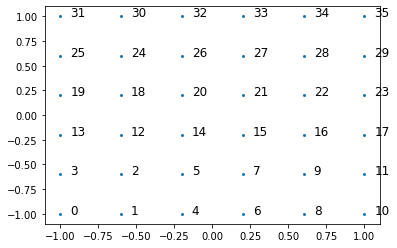

In [9]:
textdx=0.2*(2/numpy.sqrt(Npts))
plt.scatter(points[:,0],points[:,1],s=4)
for i,p in enumerate(points):
    plt.text(p[0]+textdx,p[1],str(i),fontsize=12)
plt.show()

In [10]:
# define boundary conditions
def bdfun(p):
    return p[0]*1+p[1]*2

counter=numpy.zeros(Npts,dtype=numpy.uint)
for c in cells:
    for i in c:
        counter[i]+=1
        
bd1st={};bd2nd={}
for i in range(Npts):
    if counter[i]==4:
        continue
    if numpy.isclose(points[i][1],-1) or numpy.isclose(points[i][1],1) or\
       numpy.isclose(points[i][0],-1) or numpy.isclose(points[i][0],1):
        bd1st[i]=bdfun(points[i])
    else:
        bd2nd[i]=None
print("bd1st (len=%d):\n"%(len(bd1st)),bd1st)
print("")
print("bd2nd (len=%d):\n"%(len(bd2nd)),bd2nd)

bd1st (len=20):
 {0: -3.0, 1: -2.600000023841858, 3: -2.200000047683716, 4: -2.199999988079071, 6: -1.7999999523162842, 8: -1.399999976158142, 10: -1.0, 11: -0.20000004768371582, 13: -1.399999976158142, 17: 0.6000000238418579, 19: -0.5999999046325684, 23: 1.4000000953674316, 25: 0.20000004768371582, 29: 2.200000047683716, 30: 1.399999976158142, 31: 1.0, 32: 1.800000011920929, 33: 2.200000047683716, 34: 2.600000023841858, 35: 3.0}

bd2nd (len=0):
 {}


In [11]:
counter=0
g2i={}
for i in range(Npts):
    if i not in bd1st:
        g2i[i]=counter
        counter+=1
Nipts=len(g2i)
print(g2i)

{2: 0, 5: 1, 7: 2, 9: 3, 12: 4, 14: 5, 15: 6, 16: 7, 18: 8, 20: 9, 21: 10, 22: 11, 24: 12, 26: 13, 27: 14, 28: 15}


## Then begins the real FEM

In [12]:
from tqdm import tqdm
import numpy,scipy.integrate,scipy.sparse.linalg

In [13]:
def gen_K_b(kappa=1.0):
    Kval=[];Kij=[]
    b=numpy.zeros(Nipts)
    for c in tqdm(cells):
        gen_K_cell(c,Kval,Kij,b,kappa)
    row=[i[0] for i in Kij]
    col=[i[1] for i in Kij]
    K=scipy.sparse.coo_matrix((Kval,(row,col)),shape=(Nipts,Nipts))
    return K.tocsr(),b

def gen_K_cell(cell,Kval,Kij,b,kappa):
    xyval=[(xs[i],points[p][0]) for i,p in enumerate(cell)]+[(ys[i],points[p][1]) for i,p in enumerate(cell)]
    for i in range(4):
        if cell[i] not in bd1st:
            f=sympy.lambdify([xi,eta],Ksym[i][i].subs(xyval))
            k=kappa*scipy.integrate.dblquad(f,-1,1,-1,1)[0]
            indi=g2i[cell[i]]
            Kval.append(k)
            Kij.append((indi,indi))

        for j in range(i):
            if cell[i] in bd1st and cell[j] in bd1st:
                continue
            
            f=sympy.lambdify([xi,eta],Ksym[i][j].subs(xyval))
            k=kappa*scipy.integrate.dblquad(f,-1,1,-1,1)[0]
            
            
            if cell[i] in bd1st:
                #print("detect boundary: %d->%d"%(cell[j],cell[i]))
                indj=g2i[cell[j]]
                b[indj]-=bd1st[cell[i]]*k
                del indj
            elif cell[j] in bd1st:
                #print("detect boundary: %d->%d"%(cell[i],cell[j]))
                b[indi]-=bd1st[cell[j]]*k
            else:
                indj=g2i[cell[j]]
                Kval.append(k);Kval.append(k)
                Kij.append((indi,indj))
                Kij.append((indj,indi))
        try:
            del indi
        except:
            pass
        try:
            del indj
        except:
            pass

K,b=gen_K_b()

100%|██████████| 25/25 [00:01<00:00, 15.73it/s]


In [14]:
print("K:\n",K)
print("b:\n",b)

K:
   (0, 0)	2.6666666666666674
  (0, 1)	-0.3333333333333333
  (0, 4)	-0.3333333333333333
  (0, 5)	-0.33333333333333337
  (1, 0)	-0.3333333333333333
  (1, 1)	2.6666666666666674
  (1, 2)	-0.3333333333333333
  (1, 4)	-0.33333333333333337
  (1, 5)	-0.3333333333333333
  (1, 6)	-0.33333333333333337
  (2, 1)	-0.3333333333333333
  (2, 2)	2.6666666666666674
  (2, 3)	-0.3333333333333333
  (2, 5)	-0.33333333333333337
  (2, 6)	-0.3333333333333333
  (2, 7)	-0.33333333333333337
  (3, 2)	-0.3333333333333333
  (3, 3)	2.6666666666666674
  (3, 6)	-0.33333333333333337
  (3, 7)	-0.3333333333333333
  (4, 0)	-0.3333333333333333
  (4, 1)	-0.33333333333333337
  (4, 4)	2.6666666666666674
  (4, 5)	-0.3333333333333333
  (4, 8)	-0.3333333333333333
  :	:
  (11, 7)	-0.3333333333333333
  (11, 10)	-0.3333333333333333
  (11, 11)	2.6666666666666674
  (11, 14)	-0.33333333333333337
  (11, 15)	-0.3333333333333333
  (12, 8)	-0.3333333333333333
  (12, 9)	-0.33333333333333337
  (12, 12)	2.6666666666666674
  (12, 13)	-0.3333

In [15]:
x=scipy.sparse.linalg.spsolve(K,b)
#print("x:",x)
gx=numpy.zeros(Npts)
for i in range(Npts):
    if i in bd1st:
        gx[i]=bd1st[i]
    else:
        gx[i]=x[g2i[i]]

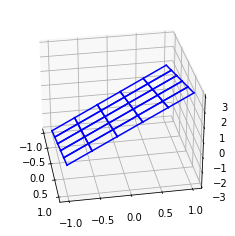

In [16]:
def plot3d(gx):
    fig=plt.figure()
    ax=fig.add_subplot(projection='3d')
    drawn=set()
    for c in cells:
        for i,j in ((0,1),(1,2),(2,3),(3,0)):
            if (c[i],c[j]) in drawn:
                continue
            xs=[points[c[i]][0],points[c[j]][0]]
            ys=[points[c[i]][1],points[c[j]][1]]
            zs=[gx[c[i]],gx[c[j]]]
            ax.plot(xs,ys,zs,'b')
            drawn.add((c[i],c[j]))
    ax.azim=-10
    plt.show()
    
plot3d(gx)